In [1]:
#python=3.6.1
import jieba
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#讀取hw1-dataset.txt
# encoding=utf-8
f=open('hw1-dataset.txt',encoding="utf-8")
text = []
for line in f:
    text.append(line)
f.close

<function TextIOWrapper.close()>

In [3]:
#計算一篇章的詞頻
def processEssay(body,number_of_essay):
    lenth=len(body)
    amount=0
    for i in range(lenth):
        if body[i] in words[number_of_essay]:
            j=words[number_of_essay].index(body[i])
            times[number_of_essay][j]=times[number_of_essay][j]+1
        else:
            words[number_of_essay].append(body[i])
            amount=amount+1
    for i in range(amount):
        TF[number_of_essay][i]=times[number_of_essay][i]/lenth
    for i in range(amount,line_size):
        times[number_of_essay][i]=0
        TF[number_of_essay][i]=0

In [4]:
#分詞
jieba.enable_paddle()
words=[]
number_of_essay=0
line_size=50
times=np.ones((len(text),line_size))
TF=np.ones((len(text),line_size))
for str in text:
    words.append([])
    seg_list = jieba.lcut(str, cut_all=False)
    processEssay(seg_list,number_of_essay)
    number_of_essay=number_of_essay+1

Paddle enabled successfully......
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 0.979 seconds.
Prefix dict has been built successfully.


In [5]:
#計算一個詞出現過幾篇文章(IDF)
def processIDF(body,word_amount):
    amount=word_amount
    lenth=len(body)
    for i in range(lenth):
        if body[i] in essay:
            j=essay.index(body[i])
            IDF_times[j]=IDF_times[j]+1
        else:
            essay.append(body[i])
            amount=amount+1
    return amount

In [13]:
#取前100高頻
t=TF.flatten()
TF_sort_num=t.argsort()
TF_sort=sorted(t, reverse=True)
TF_sort_num=np.flipud(TF_sort_num)
TF_MAX=np.zeros(100)
TF_MAX_list=[]
count=0
for i in range(TF_sort_num.size):
    row=TF_sort_num[i]//50
    col=TF_sort_num[i]%50
    if words[row][col] in TF_MAX_list:
        continue;
    else:
        TF_MAX[count]=TF_sort[i]
        TF_MAX_list.append(words[row][col])
        count=count+1
    if count==100:
        break;

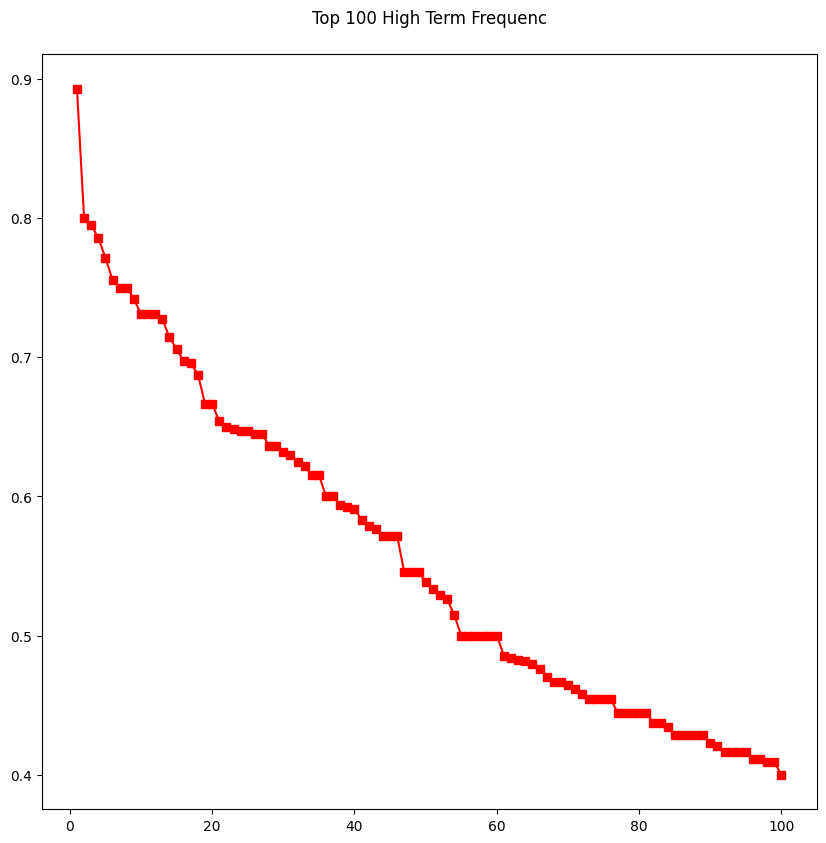

In [14]:
#繪製折條圖
a=np.arange(1,101)
plt.figure(figsize=(10,10),dpi=100,linewidth = 2)
plt.plot(a,TF_MAX,'s-',color = 'r')
plt.title("Top 100 High Term Frequenc", x=0.5, y=1.03)
plt.show()

In [ ]:
#計算IDF次數
essay=[]
word_size=TF_sort_num.size
IDF_times=np.ones(word_size)
word_amount=0
for i in range(len(words)):
    #print(i)
    temp=processIDF(words[i],word_amount)
    word_amount=temp

In [ ]:
#計算IDF
IDF=np.ones((len(text),line_size))
for i in range(len(words)):
    for j in range(len(words[i])):
        k=essay.index(words[i][j])
        a=len(text)/IDF_times[k]
        IDF=TF[i][j]*math.log(a)

In [ ]:
#取前100高tf-idf
p=IDF.flatten()
IDF_sort_num=p.argsort()
IDF_sort=sorted(p, reverse=True)
IDF_sort_num=np.flipud(IDF_sort_num)
IDF_MAX=np.zeros(100)
IDF_MAX_list=[]
count=0
for i in range(IDF_sort_num.size):
    row=IDF_sort_num[i]//50
    col=IDF_sort_num[i]%50
    if words[row][col] in IDF_MAX_list:
        continue;
    else:
        IDF_MAX[count]=IDF_sort[i]
        IDF_MAX_list.append(words[row][col])
        count=count+1
    if count==100:
        break;

In [ ]:
#繪製折條圖
a=np.arange(1,101)
plt.figure(figsize=(10,10),dpi=100,linewidth = 2)
plt.plot(a,IDF_MAX,'o-',color = 'g')
plt.title("Top 100 High TF-IDF", x=0.5, y=1.03)
plt.show()